# データ型の確認をする

In [1]:
import pandas as pd
import numpy as np

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/data/train/train_cleaned2/combined_data_21_24_25_29_30_33.csv'
data_cleaned = pd.read_csv(data_path)

# データの行数と列数をプリントする
print(f"\nデータの行数: {data_cleaned.shape[0]}")
print(f"データの列数: {data_cleaned.shape[1]}")

print(data_cleaned.dtypes)


データの行数: 14310
データの列数: 8
市区町村コード           int64
最寄駅：距離（分）         int64
間取り              object
面積（㎡）             int64
建築年               int64
建物の構造            object
取引時点              int64
取引価格（総額）_log    float64
dtype: object


# 1. ヒストグラムとボックスプロットで数値変数の異常値を確認する

count    14310.000000
mean         7.091234
std          0.300954
min          4.000000
25%          6.908485
50%          7.113943
75%          7.301030
max          7.991226
Name: 取引価格（総額）_log, dtype: float64
異常値の下限: 6.319667553700652
異常値の上限: 7.889847460841979
異常値の数: 257


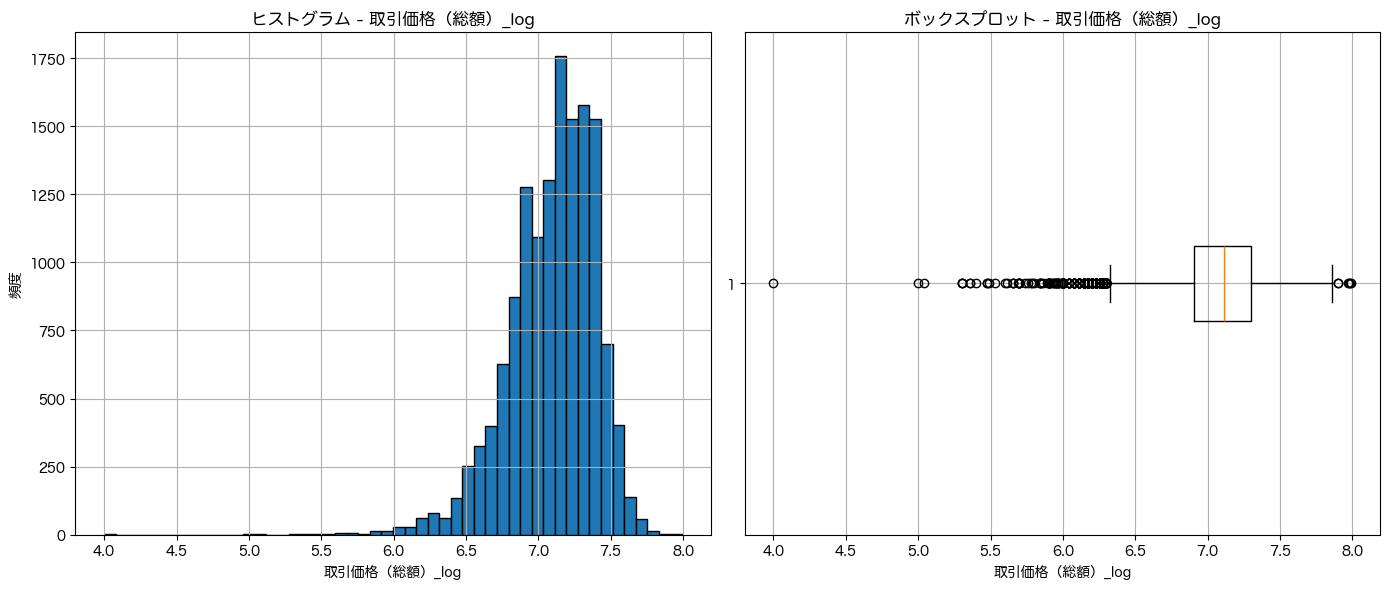

In [10]:
import pandas as pd
import numpy as np

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/data/train/train_cleaned2/combined_data_21_24_25_29_30_33.csv'  # 正しいファイルパスの確認
data_cleaned = pd.read_csv(data_path)

# 数値変数の列を数値型に変換（エラーを無視）
data_cleaned['取引価格（総額）_log'] = pd.to_numeric(data_cleaned['取引価格（総額）_log'], errors='coerce')

# 統計情報の確認
print(data_cleaned['取引価格（総額）_log'].describe())

# 四分位範囲（IQR）を使用した異常値の検出
Q1 = data_cleaned['取引価格（総額）_log'].quantile(0.25)
Q3 = data_cleaned['取引価格（総額）_log'].quantile(0.75)
IQR = Q3 - Q1

# 異常値の閾値
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 異常値の検出
outliers = data_cleaned[(data_cleaned['取引価格（総額）_log'] < lower_bound) | (data_cleaned['取引価格（総額）_log'] > upper_bound)]

# 異常値の数を確認
num_outliers = len(outliers)

# 結果を表示
print(f"異常値の下限: {lower_bound}")
print(f"異常値の上限: {upper_bound}")
print(f"異常値の数: {num_outliers}")

import matplotlib.pyplot as plt

# 日本語フォントの設定
plt.rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro']  # Mac用
plt.rcParams['axes.unicode_minus'] = False

# ヒストグラムの作成
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(data_cleaned['取引価格（総額）_log'], bins=50, edgecolor='k')
plt.title('ヒストグラム - 取引価格（総額）_log')
plt.xlabel('取引価格（総額）_log')
plt.ylabel('頻度')
plt.grid(True)

# ボックスプロットの作成
plt.subplot(1, 2, 2)
plt.boxplot(data_cleaned['取引価格（総額）_log'], vert=False)
plt.title('ボックスプロット - 取引価格（総額）_log')
plt.xlabel('取引価格（総額）_log')
plt.grid(True)

# プロットを表示
plt.tight_layout()
plt.show()


# 列内の異常値だけを削除して中央値で置き換える

市区町村コード           int64
最寄駅：距離（分）       float64
間取り              object
面積（㎡）           float64
建築年             float64
建物の構造            object
取引時点            float64
取引価格（総額）_log    float64
dtype: object

データの行数: 14310
データの列数: 8

異常値をNaNに置き換えた後のデータの行数: 14310
異常値をNaNに置き換えた後のデータの列数: 8
異常値処理後のデータを保存しました: /Users/hayakawakazue/Downloads/data/train/train_cleaned3/combined_data_21_24_25_29_30_33_最寄駅_面積（㎡）_建築年_取引時点_取引価格（総額）_log.csv
count    14310.000000
mean         7.109560
std          0.266085
min          6.322219
25%          6.929419
50%          7.146128
75%          7.301030
max          7.857332
Name: 取引価格（総額）_log, dtype: float64
異常値の下限: 6.319667553700652
異常値の上限: 7.889847460841979
異常値の数: 0


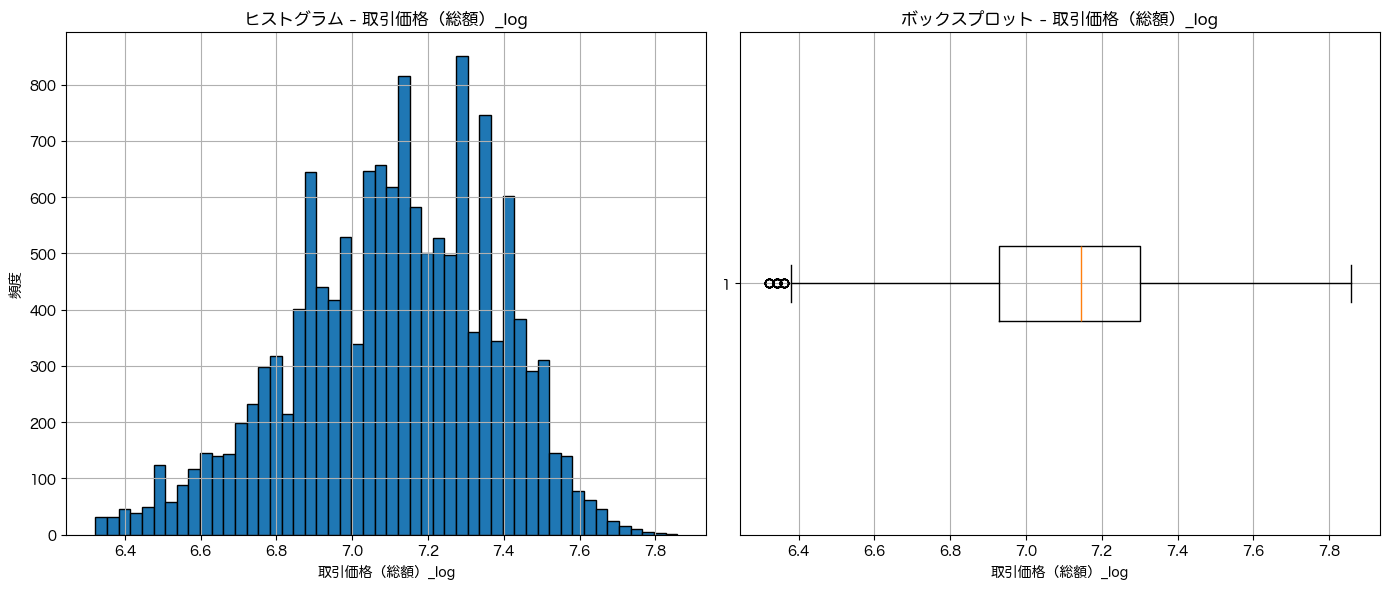


データの行数: 14310
データの列数: 8


In [11]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/data/train/train_cleaned3/combined_data_21_24_25_29_30_33_最寄駅_面積（㎡）_建築年_取引時点.csv'
data_cleaned = pd.read_csv(data_path)

# 日本語フォントの設定
plt.rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro']  # Mac用
plt.rcParams['axes.unicode_minus'] = False

print(data_cleaned.dtypes)

# データの行数と列数をプリントする
print(f"\nデータの行数: {data_cleaned.shape[0]}")
print(f"データの列数: {data_cleaned.shape[1]}")

# 列を数値型に変換（エラーを無視）
data_cleaned['取引価格（総額）_log'] = pd.to_numeric(data_cleaned['取引価格（総額）_log'], errors='coerce')

# 異常値の下限と上限を設定
lower_bound = 6.319667553700652 # 提案された下限
upper_bound = 7.889847460841979 # 提案された上限

# 異常値をNaNに置き換え
data_cleaned['取引価格（総額）_log'] = np.where(
    (data_cleaned['取引価格（総額）_log'] < lower_bound) | (data_cleaned['取引価格（総額）_log'] > upper_bound),
    np.nan,
    data_cleaned['取引価格（総額）_log']
)

# 異常値をNaNに置き換えた後の行数と列数をプリントする
print(f"\n異常値をNaNに置き換えた後のデータの行数: {data_cleaned.shape[0]}")
print(f"異常値をNaNに置き換えた後のデータの列数: {data_cleaned.shape[1]}")

# 異常値を含む行の補完（中央値で補完）
median_value = data_cleaned['取引価格（総額）_log'].median()
data_cleaned['取引価格（総額）_log'].fillna(median_value, inplace=True)

# ディレクトリが存在するか確認し、存在しない場合は作成
save_dir = '/Users/hayakawakazue/Downloads/data/train/train_cleaned3'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 異常値処理後のデータを保存
data_cleaned_path = os.path.join(save_dir, 'combined_data_21_24_25_29_30_33_最寄駅_面積（㎡）_建築年_取引時点_取引価格（総額）_log.csv')
data_cleaned.to_csv(data_cleaned_path, index=False)

# 異常値処理後のデータの確認
print(f"異常値処理後のデータを保存しました: {data_cleaned_path}")
print(data_cleaned['取引価格（総額）_log'].describe())

# 結果を表示
print(f"異常値の下限: {lower_bound}")
print(f"異常値の上限: {upper_bound}")
print(f"異常値の数: {(data_cleaned['取引価格（総額）_log'].isna()).sum()}")

# ヒストグラムの作成
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(data_cleaned['取引価格（総額）_log'], bins=50, edgecolor='k')
plt.title('ヒストグラム - 取引価格（総額）_log')
plt.xlabel('取引価格（総額）_log')
plt.ylabel('頻度')
plt.grid(True)

# ボックスプロットの作成
plt.subplot(1, 2, 2)
plt.boxplot(data_cleaned['取引価格（総額）_log'], vert=False)
plt.title('ボックスプロット - 取引価格（総額）_log')
plt.xlabel('取引価格（総額）_log')
plt.grid(True)

# プロットを表示
plt.tight_layout()
plt.show()

# データの行数と列数をプリントする
print(f"\nデータの行数: {data_cleaned.shape[0]}")
print(f"データの列数: {data_cleaned.shape[1]}")


# 異常値をmedianで補完する場合のコード

count    1290.000000
mean        6.937721
std         0.390206
min         5.698970
25%         6.643453
50%         6.991226
75%         7.278754
max         7.698970
Name: 取引価格（総額）_log, dtype: float64
異常値を中央値で補完後、データを保存しました: /Users/hayakawakazue/Downloads/data/train/train_cleaned3/train_03_cleaned_最寄駅_面積（㎡）_建築年_取引時点_取引価格（総額）_log.csv


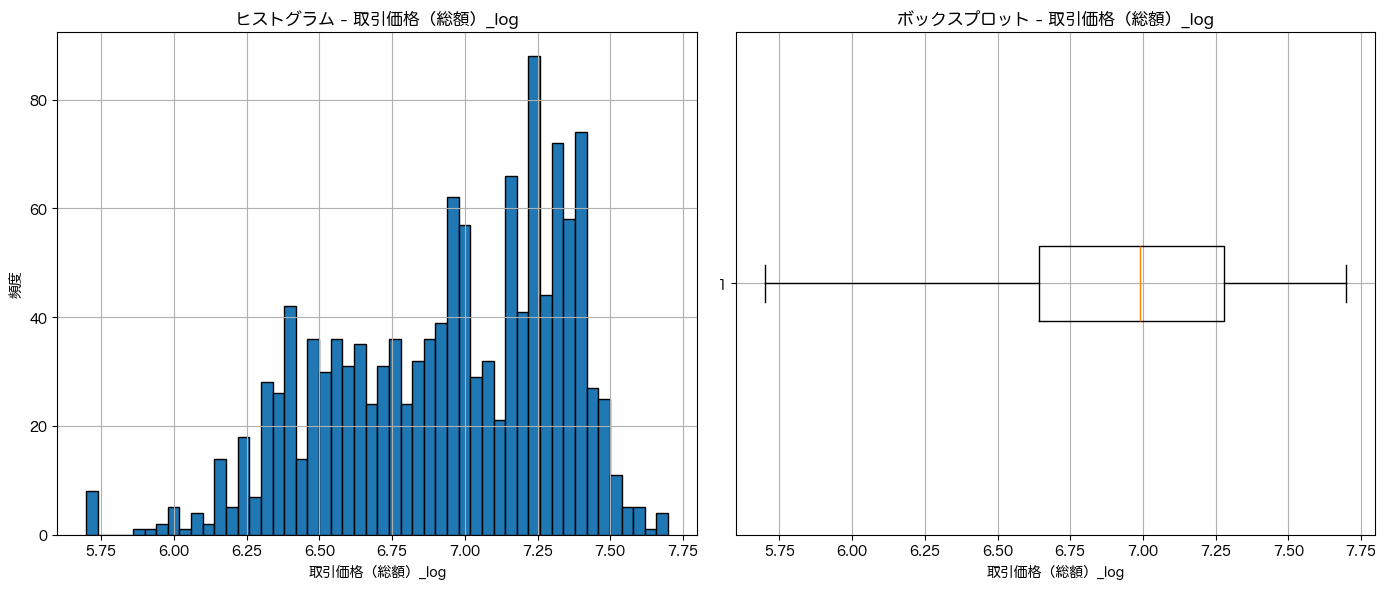


データの行数: 1290
データの列数: 8


In [22]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# 日本語フォントの設定
plt.rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro']  # Mac用
plt.rcParams['axes.unicode_minus'] = False

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/data/train/train_cleaned3/train_03_cleaned_最寄駅_面積（㎡）_建築年_取引時点.csv'  # 正しいファイルパスの確認
data_cleaned = pd.read_csv(data_path)

# 最寄駅：距離（分）の異常値の補完
Q1 = data_cleaned['取引価格（総額）_log'].quantile(0.25)
Q3 = data_cleaned['取引価格（総額）_log'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 外れ値の検出
outliers = data_cleaned[(data_cleaned['取引価格（総額）_log'] < lower_bound) | (data_cleaned['取引価格（総額）_log'] > upper_bound)]

# 外れ値を中央値で補完
median_value = data_cleaned['取引価格（総額）_log'].median()
data_cleaned.loc[data_cleaned['取引価格（総額）_log'] < lower_bound, '取引価格（総額）_log'] = median_value
data_cleaned.loc[data_cleaned['取引価格（総額）_log'] > upper_bound, '取引価格（総額）_log'] = median_value

# 補完後の結果を確認
print(data_cleaned['取引価格（総額）_log'].describe())

# データの保存
data_cleaned_path = '/Users/hayakawakazue/Downloads/data/train/train_cleaned3/train_03_cleaned_最寄駅_面積（㎡）_建築年_取引時点_取引価格（総額）_log.csv'
data_cleaned.to_csv(data_cleaned_path, index=False)

print(f"異常値を中央値で補完後、データを保存しました: {data_cleaned_path}")

# ヒストグラムの作成
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(data_cleaned['取引価格（総額）_log'], bins=50, edgecolor='k')
plt.title('ヒストグラム - 取引価格（総額）_log')
plt.xlabel('取引価格（総額）_log')
plt.ylabel('頻度')
plt.grid(True)

# ボックスプロットの作成
plt.subplot(1, 2, 2)
plt.boxplot(data_cleaned['取引価格（総額）_log'], vert=False)
plt.title('ボックスプロット - 取引価格（総額）_log')
plt.xlabel('取引価格（総額）_log')
plt.grid(True)

# プロットを表示
plt.tight_layout()
plt.show()

# データの行数と列数をプリントする
print(f"\nデータの行数: {data_cleaned.shape[0]}")
print(f"データの列数: {data_cleaned.shape[1]}")


# 異常値を削除する場合のコード

異常値処理後のデータを保存しました: /Users/hayakawakazue/Downloads/data/train/train_cleaned3/train_04_cleaned_最寄駅_面積（㎡）_建築年_取引時点_取引価格（総額）_log.csv
count    7984.000000
mean        7.124204
std         0.270714
min         6.255273
25%         6.944483
50%         7.146128
75%         7.322219
max         7.875061
Name: 取引価格（総額）_log, dtype: float64
異常値の下限: 6.254948897898197
異常値の上限: 7.893036422785608
異常値の数: 171


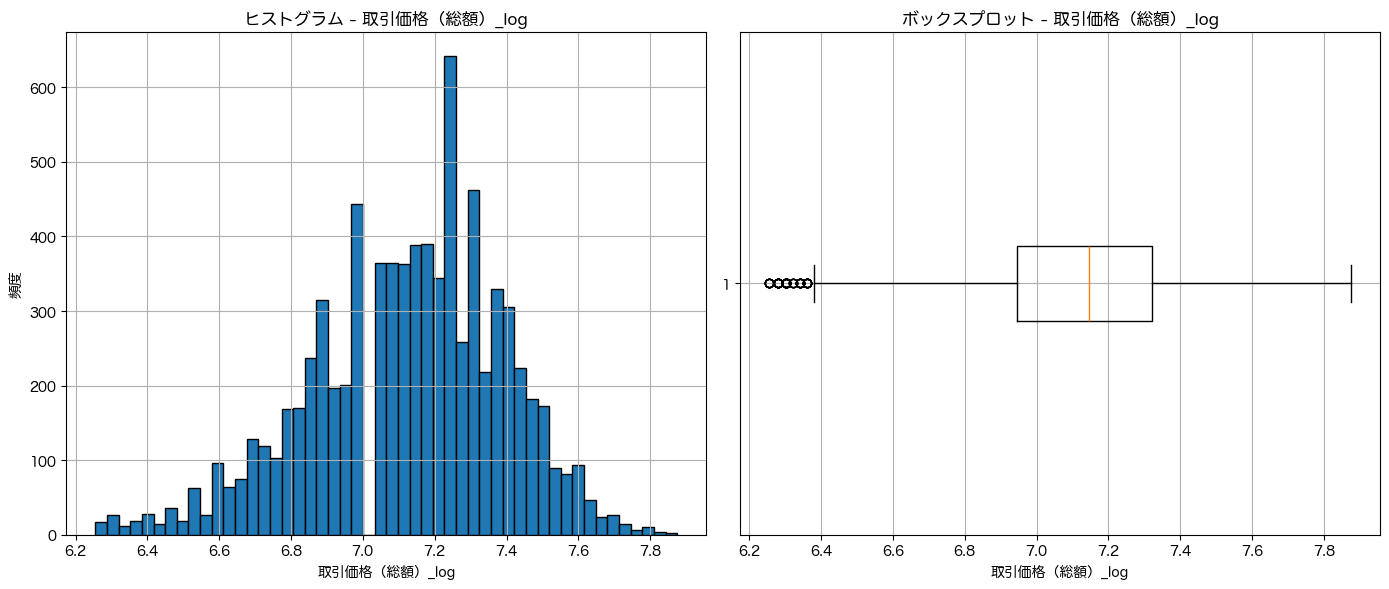

In [16]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/data/train/train_cleaned3/train_04_cleaned_最寄駅_面積（㎡）_建築年_取引時点.csv'
data_cleaned = pd.read_csv(data_path)

# 日本語フォントの設定
plt.rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro']  # Mac用
plt.rcParams['axes.unicode_minus'] = False

# 列を数値型に変換（エラーを無視）
data_cleaned['取引価格（総額）_log'] = pd.to_numeric(data_cleaned['取引価格（総額）_log'], errors='coerce')

# 異常値の下限と上限を設定
lower_bound = 6.254948897898197 # 現在の下限
upper_bound = 7.893036422785608  # 提案された上限

# 異常値の削除
data_cleaned = data_cleaned[(data_cleaned['取引価格（総額）_log'] >= lower_bound) & (data_cleaned['取引価格（総額）_log'] <= upper_bound)]

# ディレクトリが存在するか確認し、存在しない場合は作成
save_dir = '/Users/hayakawakazue/Downloads/data/train/train_cleaned3'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 異常値処理後のデータを保存
data_cleaned_path = os.path.join(save_dir, 'train_04_cleaned_最寄駅_面積（㎡）_建築年_取引時点_取引価格（総額）_log.csv')
data_cleaned.to_csv(data_cleaned_path, index=False)

# 異常値処理後のデータの確認
print(f"異常値処理後のデータを保存しました: {data_cleaned_path}")
print(data_cleaned['取引価格（総額）_log'].describe())

# 結果を表示
print(f"異常値の下限: {lower_bound}")
print(f"異常値の上限: {upper_bound}")
print(f"異常値の数: {num_outliers}")

# ヒストグラムの作成
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(data_cleaned['取引価格（総額）_log'], bins=50, edgecolor='k')
plt.title('ヒストグラム - 取引価格（総額）_log')
plt.xlabel('取引価格（総額）_log')
plt.ylabel('頻度')
plt.grid(True)

# ボックスプロットの作成
plt.subplot(1, 2, 2)
plt.boxplot(data_cleaned['取引価格（総額）_log'], vert=False)
plt.title('ボックスプロット - 取引価格（総額）_log')
plt.xlabel('取引価格（総額）_log')
plt.grid(True)

# プロットを表示
plt.tight_layout()
plt.show()


In [5]:
import pandas as pd

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/data/train/train_cleaned3/combined_data_02_05_06_最寄駅_面積（㎡）_建築年.csv'
data_cleaned = pd.read_csv(data_path)

# データの最初の数行を表示
print(data_cleaned.head())

# データの基本情報を表示
print(data_cleaned.info())


   市区町村コード  最寄駅：距離（分）   間取り  面積（㎡）     建築年 建物の構造  取引時点  取引価格（総額）_log
0     2202       10.0    １Ｋ   50.0  1989.0   ＳＲＣ   NaN      6.913814
1     2202       23.0  ３ＬＤＫ   55.0  1992.0   ＳＲＣ   NaN      6.913814
2     2201       45.0  ３ＬＤＫ   75.0  1987.0   ＳＲＣ   NaN      7.000000
3     2201       25.0    １Ｋ   20.0  1991.0   ＳＲＣ   NaN      6.255273
4     2203       17.0  ３ＬＤＫ   65.0  1982.0   ＳＲＣ   NaN      6.724276
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1951 entries, 0 to 1950
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   市区町村コード       1951 non-null   int64  
 1   最寄駅：距離（分）     1951 non-null   float64
 2   間取り           1951 non-null   object 
 3   面積（㎡）         1951 non-null   float64
 4   建築年           1951 non-null   float64
 5   建物の構造         1951 non-null   object 
 6   取引時点          0 non-null      float64
 7   取引価格（総額）_log  1951 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usa